In [62]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [104]:
def test(a, b, c):
    print(a)
    print(len(b))
    print(c[0,0])

model = torchvision.models.vgg16(pretrained=True).eval()


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/justin/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [11:15<00:00, 818805.61it/s]


In [116]:
im = torch.rand(1, 3, 224, 224)
im.requires_grad = True
#model.fc.register_forward_hook(test)
optimiser = torch.optim.Adam([im,], lr=0.1)


for i in range(1024):
    
    
    optimiser.zero_grad()
    
    shiftx = np.random.randint(8)
    shifty = np.random.randint(8)
    output = model(im.roll((shiftx, shifty), (2, 3)))
    loss = -output[0,0]
    if i % 10 == 0:
        print(loss)
    loss.backward()
    optimiser.step()
    #print(im.grad)


RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

(-108.881874, 112.191826)


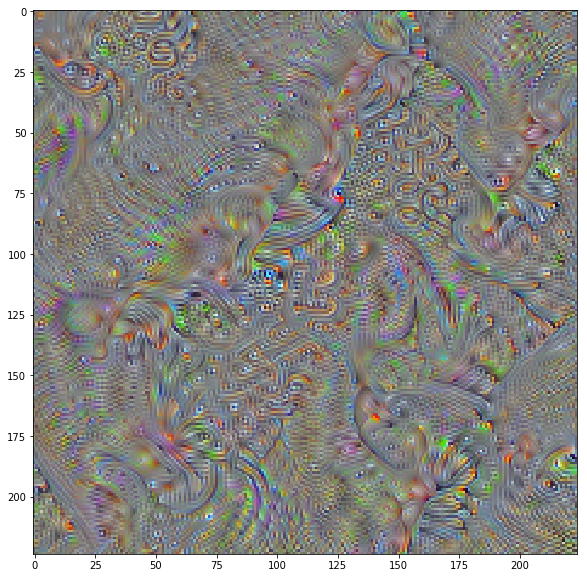

In [114]:
img = im.detach().permute(3,2,1,0)
img = img[:,:,:,0].numpy()

maxVal = np.max(img, axis=(0, 1, 2))
minVal = np.min(img, axis=(0, 1, 2))
print((minVal, maxVal))
plt.figure(figsize=(10,10))
plt.imshow((img - minVal)/(maxVal - minVal))

7